# Исследование тарифов сотовой связи

In [39]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [40]:
calls = pd.read_csv('/Users/anshilina/Documents/calls.csv')
sessions = pd.read_csv('/Users/anshilina/Documents/internet.csv', index_col=0)
messages = pd.read_csv('/Users/anshilina/Documents/messages.csv')
tariffs = pd.read_csv('/Users/anshilina/Documents/tariffs.csv')
users = pd.read_csv('/Users/anshilina/Documents/users.csv')

Изучим информацию о звонках.

In [41]:
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [42]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


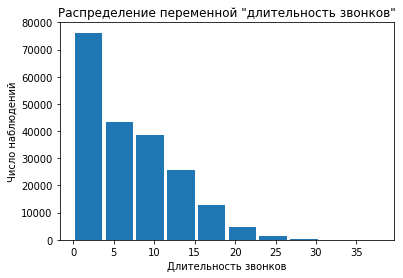

In [43]:
calls['duration'].hist(rwidth=0.9)
plt.xlabel('Длительность звонков')
plt.ylabel('Число наблюдений')
plt.title('Распределение переменной "длительность звонков"')
plt.grid()
plt.show()

Распределение длительности звонков смещено влево – тяжёлый правый хвост. Чем больше продолжительность звонка, тем меньше людей, которые так долго говорят по телефону. Мы видем звонки с нулевой продолжительностью – нулями обозначены пропущенные звонки.

Далее изучим информацию по интернет-трафику.

In [44]:
display(sessions.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [45]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


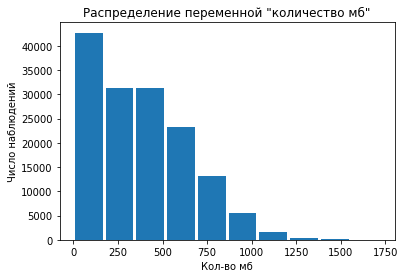

In [46]:
sessions['mb_used'].hist(rwidth=0.9)
plt.xlabel('Кол-во мб')
plt.ylabel('Число наблюдений')
plt.title('Распределение переменной "количество мб"')
plt.grid()
plt.show()

Распределение также смещено влево. Большинству пользователей хватает 0-250 мб интернета, некоторые используют 1250-1500 мб.

Теперь рассмотрим информацию по сообщениям.

In [47]:
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [48]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Далее представлена общая информация по каждому из двух рассматриваемых тарифов. 

In [49]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [50]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Наконец, общая информация по пользователям:

In [51]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Подготовим данные

Приведем столбцы с данными по дате

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу с помощью метода `to_datetime()`.

In [52]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

В столбце `duration` датафрейма `calls` значения дробные. Округлим значения столбца `duration` вверх с помощью метода `numpy.ceil()` и приведите столбец `duration` к типу `int`.

In [53]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

Создадим столбец `month` в датафрейме `calls`, `messages`, `sessions` с номером месяца из столбца `call_date`, `message_date` и `session_date`.

In [54]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [55]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [56]:
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам и сохраним в переменную `calls_per_month`

In [57]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [58]:
display(calls_per_month.head(10))

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраните в переменную `minutes_per_month`

In [59]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [60]:
display(minutes_per_month.head(10))

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраним в переменную `messages_per_month`.

In [61]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

In [62]:
display(messages_per_month.head(10))

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя и сохраните в переменную `sessions_per_month`.

In [63]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [64]:
display(sessions_per_month.head(10))

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

## Анализ данных и подсчёт выручки

Объединим все посчитанные выше значения в один датафрейм `user_behavior`.
Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [65]:
user_behavior = (calls_per_month
                .merge(messages_per_month, left_index=True, right_index=True, how='outer')
                .merge(sessions_per_month, left_index=True, right_index=True, how='outer')
                .merge(minutes_per_month, left_index=True, right_index=True, how='outer')
                .reset_index()
                .merge(users, how='left', left_on='user_id', right_on='user_id')
)

In [66]:
display(user_behavior.head())

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [67]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных нулевыми значениями.

In [68]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Добавим в массив информацию о тарифах.

In [69]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
user_behavior = user_behavior.merge(tariffs, on='tariff')

Считаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф.

In [70]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`.

In [71]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет.

In [72]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбец `total_cost`.

In [73]:
user_behavior['total_cost'] = \
user_behavior[['rub_monthly_fee', 'cost_minutes', 'cost_messages','cost_gb']].sum(axis=1)

Создадим массив `stats_df` для каждой пары "месяц-тариф", где будут храниться основные характеристики (среднее, стандартное отклонение, медиана) по группе. Для этого сгруппируем данные по месяцу и тарифу с помощью `pivot_table` и посчитаем соответствующие метрики.

In [74]:
stats_df = user_behavior.pivot_table(
    index=['month', 'tariff'],
    values=['calls', 'minutes', 'messages', 'mb_used'],
    aggfunc=['mean', 'std', 'median']
).round(3).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

display(stats_df.head(10))

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.676,8513.718,18.235,203.853,20.812,6444.681,16.198,154.231,20.5,7096.185,15.0,162.5
1,1,ultra,59.444,13140.681,33.778,428.111,41.639,6865.347,30.671,269.758,51.0,14791.370,32.0,382.0
2,2,smart,40.190,11597.054,24.086,298.690,25.394,6247.354,21.751,190.820,38.5,12553.710,20.0,258.0
3,2,ultra,41.542,11775.938,21.958,297.125,40.972,10644.644,26.774,296.513,25.0,7327.125,5.5,168.0
4,3,smart,54.325,15104.159,31.857,390.052,25.537,5828.238,26.805,191.894,59.0,15670.250,23.0,409.0
5,3,ultra,67.676,17535.550,32.297,489.649,44.838,10951.786,41.622,333.744,57.0,17495.180,20.0,403.0
6,4,smart,51.312,13462.181,30.741,367.134,25.705,5698.249,24.539,186.489,52.0,14087.650,28.0,368.5
7,4,ultra,64.091,16828.134,31.564,458.018,36.272,9718.650,37.514,267.682,61.0,16645.780,17.0,453.0
8,5,smart,55.241,15805.184,33.773,387.362,25.377,5978.232,27.037,186.601,59.0,16323.940,30.0,433.0
9,5,ultra,72.507,19363.153,37.851,510.328,41.081,10046.110,40.307,289.604,75.0,18696.430,25.0,519.0


Изучим распределение среднего количества звонков по видам тарифов и месяцам.

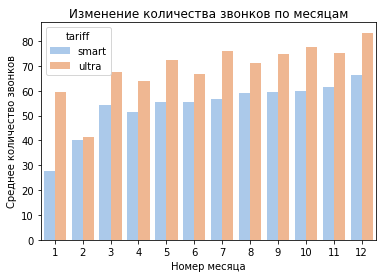

In [75]:
ax = sns.barplot(x='month', # по Ох месяка
            y='calls_mean', # по Оу среднее по кол-ву звонков
            hue="tariff", # группируем данные по тарифам
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Изменение количества звонков по месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков')
plt.show()

Теперь изучим распределение кол-ва звонков по клиентам, использующим разные тарифы.

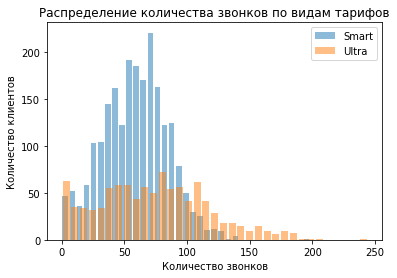

In [76]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5, rwidth=0.8)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества звонков по видам тарифов')
plt.show()

Далее изучим распределение средней продолжительности звонков по видам тарифов и месяцам.

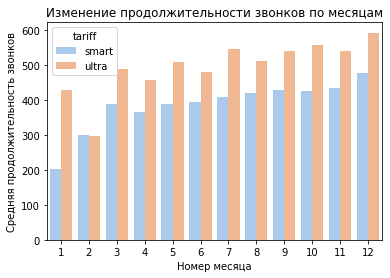

In [77]:
ax = sns.barplot(x='month', # по оси Ох месяц
            y='minutes_mean', # по оси Оу средняя продолжительность звонков
            hue="tariff", # группируем данные по тарифам
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Изменение продолжительности звонков по месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков')
plt.show()

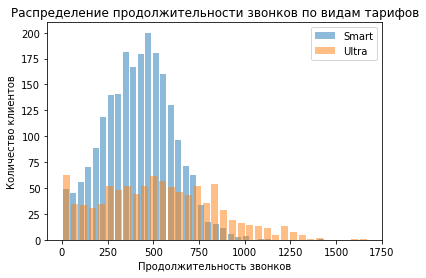

In [78]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, rwidth=0.8)
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, rwidth=0.8)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество клиентов')
plt.title('Распределение продолжительности звонков по видам тарифов')
plt.grid()
plt.show()

**Вывод:** Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что в феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Изучим распределение среднего количества сообщений по видам тарифов и месяцам.

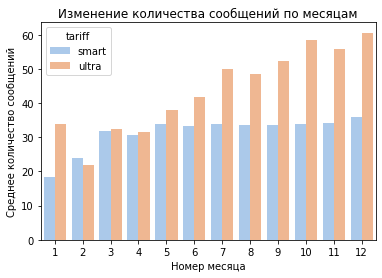

In [79]:
ax = sns.barplot(x='month', # по оси Ох месяц
            y='messages_mean', # по оси Оу среднее по количеству сообщений
            hue="tariff", # группируем данные на графике по тарифу
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Изменение количества сообщений по месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений')
plt.show()

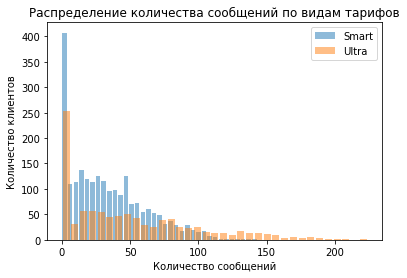

In [80]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, rwidth=0.8, label='Smart')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, rwidth=0.8, label='Ultra')

plt.legend()
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества сообщений по видам тарифов')
plt.grid()
plt.show()

**Вывод:** В среднем пользователи тарифа Ultra отправляют больше сообщений, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную динамику.

Изучим распределение трафика мобильного интернета по месяцам и тарифам.

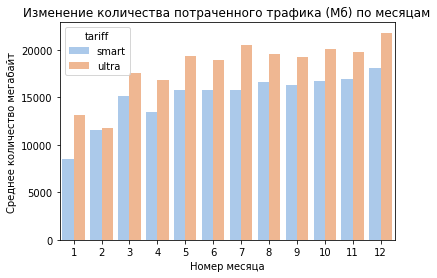

In [81]:
ax = sns.barplot(x='month', # по оси Ох месяц
            y='sessions_mean', # по оси Оу среднее по трафику
            hue="tariff", # группируем данные на графике по тарифам
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Изменение количества потраченного трафика (Мб) по месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт')
plt.show()

Сравним распределение потраченных мегабайт среди пользователей тарифов Smart и Ultra.

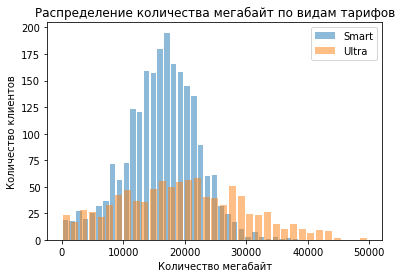

In [82]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, rwidth=0.8)
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, rwidth=0.8)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества мегабайт по видам тарифов')
plt.grid()
plt.show()

**Вывод:** Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

### Проверка гипотез

Из анализа данных мы видим, что тарифы по-разному используются клиентами. Клиенты тарифа Ultra в среднем чаще и дольше звонят по телефону, отправляют больше сообщений и тратят больше трафика в интернете, чем пользователи тарифа Smart. Значит ли это, что выручка от каждого из этих двух тарифов различается? 

Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"
alpha = 0.05
```

In [99]:
# используем тест Стьюдента для независимых выборок

results = st.ttest_ind(
    user_behavior.query('tariff == "ultra"')['total_cost'],
    user_behavior.query('tariff == "smart"')['total_cost'],
    equal_var = False
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод:** Мы отвергаем нулевую гипотезу в пользу альтернативной: выручки, полученные от двух тарифов, не равны.

Также проверим гипотезу о том, что пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [100]:
results = st.ttest_ind(
    user_behavior.query('city == "Москва"')['total_cost'],
    user_behavior.query('city != "Москва"')['total_cost'],
)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Мы не можем отвергнуть нулевую гипотезу: пользователи из Москвы не приносят больше выручки, чем пользователи из других городов.

## Вывод

Мы проанализировали небольшую выборку клиентов тарифных планов Ультра и Смарт. В результате мы определили, что клиенты по-разному используют каждый из тарифов. На основе этого мы предположили, что выручка от разных тарифов будет различна, а также что пользователи из Москвы будут приносить больше прибыли, чем пользователи из других городов. Наше предположение о том, что выручка от двух тарифов различна подтвердилось (alpha < 0.05). Второе предположение о том, что москвичи приносят больше прибыли, не подтвердилось.